In [1]:
# example for reading DARDAR .h5 data file
import h5py
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
import os
#from os import listdir

In [20]:
#dirt = '/home/dudavid/Dendrite/DAR/'
dirt = '/home/dudavid/Dendrite/Dendrite/SatData/DARDAR/2008/11/' # one day as example
#dirt = '/home/dudavid/Dendrite/Dendrite/SatData/DARDAR/2008/11/25/' # one day as example
#files = os.listdir(dirt)
days = os.listdir(dirt)
iwpall,lata,dna,dmask = [],[],[],[]

In [26]:
for d in range(1):
    files = os.listdir(dirt+days[d])
    #for fix in range(2):
    for fix in range(len(files)):
        #print(files[fix])
        file = dirt+days[d]+'/'+files[fix]

        f = h5py.File(file,'r')
        iw = np.array(f['iwc']) # IWC in kg/m^3
        flag = np.array(f['land_water_mask'])
        # mask is from calipso flags where:
        # (http://www.icare.univ-lille1.fr/projects_data/dardar/docs/varcloud-algorithm_description-v1.0.pdf)
        #  0=shallow ocean 1=land 2=coastlines 3=shallow inland water 4=intermittent water 
        #  5=deep inland water 6=coastal ocean 7=deep ocean
        hgt = np.array(f['height']) #height above sea level in m [436]
        hmask,dz = [], []
        for z in range(len(hgt)):
            if hgt[z]>=0 and hgt[z]<20000:  hmask.append(z)
        #        dz.append(hgt[z]-hgt[z+1]) #these are all 60m!
        mask = flag>4
        iwc = iw[mask,:] # just profiles over ocean (for now)
        
        dmsk = np.array(f['DARMASK_Simplified_Categorization'])[mask] #as follows (same source doc):
        # -9 ground, -1 dunno, 0 clear, 1 ice, 2 ice+supercooled, 3 liquid (warm),
        #  4 supercooled, 5 rain, 6 aerosol, 7 maybe insects, 8 stratospheric feature
        lat = np.array(f['latitude'])[mask]
        #lon = np.array(f['longitude'])[mask]
        dayn = np.array(f['day_night_flag'])[mask] #day=0, night=1
        print('# profiles summing: ',len(iwc[:,20]))

        iwp = [sum(iwc[x,hmask]*60.0) for x in range(len(iwc[:,20]))]
        # all range gates are 60m here, so kg/m3 * m yields IWP in kg/m2
        
        iwpall.extend(iwp)
        lata.extend(lat)
        dna.extend(dayn)
        dmask.extend(dmsk)


26991 26991
# profiles summing:  26991
26991 30209
# profiles summing:  30209
26991 18109
# profiles summing:  18109
26991 15396
# profiles summing:  15396
26991 20332
# profiles summing:  20332
26991 23804
# profiles summing:  23804
26991 22228
# profiles summing:  22228
26991 25700
# profiles summing:  25700
26991 29164
# profiles summing:  29164
26991 20930
# profiles summing:  20930


KeyboardInterrupt: 

1210046
[ 1474  8874 23004 35357 46392 54703 60874 65576 72950 67636 56426 49038
 36747 23443 18926 11071]


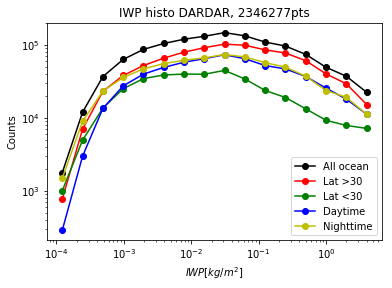

In [22]:
# create histogram of IWP

#b = np.histogram(iwp,bins=[0.001,.005,.01,.05,.1,.5,1,2,4,8])
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2,4,8]
binz = [2**x for x in range(-14,3)]
iwpa = np.array(iwpall)
latah = np.array(lata)
dnaa = np.array(dna)
hist, bin_edges = np.histogram(iwpa,bins=binz)#,density=1)
mask1 = abs(latah)>30.0
mask2 = abs(latah)<30.0
mask3 = dnaa==0
mask4 = dnaa==1
iw1 = iwpa[mask1] #high lats
iw2 = iwpa[mask2] #tropics
iw3 = iwpa[mask3]
iw4 = iwpa[mask4]
hist1, bin_edges = np.histogram(iw1,bins=binz)#,density=1)
hist2, bin_edges = np.histogram(iw2,bins=binz)#,density=1)
hist3, bin_edges = np.histogram(iw3,bins=binz)#,density=1)
hist4, bin_edges = np.histogram(iw4,bins=binz)#,density=1)
print(sum(hist))
fig = plt.figure()
ax = fig.add_subplot(111)

np.size(iwpa)
#type(iwp)
numbins = len(hist)
#ax.hist(iwp,numBins,color='green')#,alpha=0.8)
plt.plot(binz[1:],hist,'k-o',label='All ocean')
plt.plot(binz[1:],hist1,'r-o',label='Lat >30')
plt.plot(binz[1:],hist2,'g-o',label='Lat <30')
plt.plot(binz[1:],hist3,'b-o',label='Daytime')
plt.plot(binz[1:],hist4,'y-o',label='Nighttime')
print(hist4)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$IWP [kg/m^2]$')
plt.ylabel('Counts')
plt.legend()
plt.title('IWP histo DARDAR, '+str(len(iwpa))+'pts')#+fii)
plt.show()